## Word embeddings!

In this notebook, we are going to work with word embeddings. Word embeddings are vectors that represent words in a specific language in an N-dimensional space, such as 200, 300 or even more.

Let's import some necessary packages.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from datetime import datetime 

In [6]:
# Install the adjustText package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install adjustText
from adjustText import adjust_text

You should consider upgrading via the 'C:\Users\ioaar\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


A number of pretrained embeddings are offered online in different languages. For example, you can download word embeddings trained on raw Wikipedia text from here:

https://github.com/facebookresearch/fastText/blob/master/docs/pretrained-vectors.md

These vectors have 300 dimensions and were obtained using using fastText and the skip-gram model described in Bojanowski et al. (2016) with default parameters.

You should download the embeddings in **text** format. Downloading these files may take a while as they are several gigabytes in size, depending on the language you choose.
For the purposes of this notebook, you can use a shortened version of word embeddings in english: ```wiki.en.vec.short``` , that you can find in the ``` Notebooks``` folder.

The files follow a specific format.

##### FILE FORMAT:

The **first line** in the file contains two numbers separated by a single space. The first number indicates the number of words in the file (`N_WORDS`) and the second number specifies the number of dimensions (`N_DIMENSIONS`) that are used to represent those words.

After the first line, each line will contain one word at the beginning. Following the word, and separated by spaces, there will be `N_DIMENSIONS` numbers, which represent each word in the space.

The words are sorted by their frequency in the wikipedia corpus. The first words in the file will be the most frequent ones. Let's read and print the first 4 lines of the file:

In [7]:
f=open("wiki.en.vec.short", encoding="utf-8")
lines=f.readlines()[:4]
lines

['299999 300\n',
 ', -0.023167 -0.0042483 -0.10572 0.042783 -0.14316 -0.078954 0.078187 -0.19454 0.022303 0.31207 0.057462 -0.11589 0.096633 -0.093229 -0.034229 -0.14652 -0.11094 -0.11102 0.067728 0.10023 -0.067413 0.23761 -0.13105 -0.0083979 -0.10593 0.24526 0.065903 -0.2374 -0.10758 0.0057082 -0.081413 0.26264 -0.052461 0.20306 0.05062 -0.18866 -0.11494 -0.25752 0.046799 -0.050525 0.06265 0.15433 -0.056289 -0.048437 -0.099688 -0.035332 -0.091647 -0.081151 -0.0010844 -0.08414 -0.13026 0.01498 -0.086276 -0.053041 -0.10644 -0.042314 0.086469 0.22614 -0.16078 0.18845 0.053098 -0.21475 0.16699 -0.14442 -0.1593 0.0062456 -0.07663 -0.091568 -0.28984 0.027078 0.021275 0.023939 0.14903 -0.33062 -0.097811 -0.033814 0.070587 0.023294 0.065382 0.18716 -0.13444 0.14431 -0.0268 -0.022903 0.097554 -0.032909 -0.027827 -0.068771 0.17053 -0.05946 0.020424 -0.077589 0.1216 -0.077437 0.10665 0.051087 0.0076379 -0.064936 0.09031 0.059447 0.0048881 0.078309 -0.012163 0.062155 -0.072664 0.17857 -0.22874 0.

We can see that the file contains embedding vectors of 299999 words and 300 dimensions, while the 3 most frequent words in the wikipedia corpus are ```,```, ```.``` and ```the```. Note that all the information in the file (even the numeric values) is saved as stings. Also note that in the end of each line there is the newline character ```\n``` that we will have to ignore when storing the embeddings.

 #### Exercise 1:
 
In order to play with word embeddings, we need a way of storing them. 

Write a function that reads the file and stores the words and their embeddings in a dictionary.
Each word should be mapped to a numpy vector array. Name the dictionary `embs_dict`

In [ ]:
#Your code here



In [ ]:
embs_dict= 

# Visualizing word embeddings

Word embeddings are trained based on the distributional properties and contexual information of the input words. For this reason they are able capture semantic associations between them!

What does this mean?
    
> *Similar words tend to have similar vectors*

> *Semantically close words occupy neighboring positions in the embedding space.* 

Now that you have saved the words and their corresponding embedding vectors in a dictionary, let's choose some words and  visualize them to see how they are positioned in the embedding space. In order to do this we have to project the 300-dimensional vectors in to 2-D.

 #### Exercise 2:
 
>Get the embedding vectors of the following words:

```'red'```,```'blue'```, ```'yellow'```, ```'green'```, ```'cat'```, ```'dog'```, ```'pet'```, ```'rabbit'```, ```'gin'```, ```'vodka'```,```'whiskey'```, ```'beer'```, ```'math'```, ```'physics'```, ```'science'```, ```'biology'```

and 
>Plot them in 2-D using [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)   ```fit_transform``` method

*Remember to [add annotations](https://adjusttext.readthedocs.io/en/latest/Examples.html) for each point in the plot so that we can see which word corresponds to which point in the space*

In [ ]:
words=['red','blue', 'yellow', 'green', 'cat', 'dog', 'pet', 'rabbit', 'gin',
       'vodka','whiskey', 'beer','math', 'physics', 'science', 'biology']

#Your code here


What do you observe?

#### Exercise 3: 

Now repeat the same process but instead of using PCA, use [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for projecting the embedding vectors in 2-D.

t-SNE is the most commonly used algorithm for visualizing word embeddings as, compared to other dimensionality reduction methods, it better preserves the global structure of the data!

Given that we only considered a very small number of words, we should adjust ```perplexity``` parameter of ```TSNE``` algorithm accordingly to get meaningful results. The default value is ```perplexity= 30``` which makes sense for much bigger datasets. Use a smaller value instead like ```5```.

In [ ]:
words=['red','blue', 'yellow', 'green', 'cat', 'dog', 'pet', 'rabbit', 'gin',
       'vodka','whiskey', 'beer','math', 'physics', 'science', 'biology']

#Your code here

Did you do it? 

Good! Now run the previous cell again. What do you observe?

>t-SNE is a stochastic algorithm which means that if you run it multiple times on the same data, you will get different results, resulting in different plots. 

>Does it matter? Not really, because we are interested in the *relative positions between the words* in the space which remain the same.

>However, if you want to get the exact same results every time you run the code, you can specify a seed value for `TSNE`  using the `random_state parameter`.

# Similarity between words

A common metric used to measure the similarity between two words is the cosine similarity, which measures the cosine of the angle between the two vectors that represent each of the words.
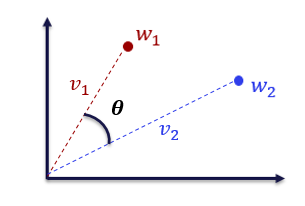

This similarity value is calculated by using this formula:

$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\|_2 \|\mathbf{B}\|_2} $

For the first part of the formula, we have to compute the dot product between vectors $\mathbf{A}$ and $\mathbf{B}$.

$\mathbf{A} \cdot \mathbf{B} = \sum\limits_{i=1}^{n}{A_i  B_i}$

In the denominator, you have to calculate the Euclidean $(L^2)$ norm of each vector ($\mathbf{A}$ and $\mathbf{B}$) and multiply their results. The Euclidean norm is calculated using this formula:

$\|\mathbf{A}\|_2 = \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}$


The resulting number of this cosine similarity formula lies with a range of $[-1,1]$ and it should be interpreted as a similarity score between two words. The higher the number, the higher will be the similarity between those words.

#### Exercise 4: 

L2  norm can be calculated with the linalg.norm function from numpy. We can check the result:

np.linalg.norm([3, 4])

Create a function that computes the cosine similarity between to vectors by using numpy. 
You can code the $L^2$ from scratch or you can use the [numpy implementation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [ ]:
def cosine_similarity(v1, v2):
    
    #Your code here

Now let's try it out:

In [8]:
print(cosine_similarity([1, 2, 3],[-1, -3, -2]))
print(cosine_similarity([2.2, 1.8, 3.5, 0.9],[2.2, 1.8, 3.5, 0.9]))

-0.9285714285714286
0.9999999999999998


#### Exercise 5:

Create a function that, given a word, it returns the top-n most similar words using cosine similarity.

>*Hints:*

> *The function should first compute all the pairwise similarities between the input word and all the words in the word embeddings dictionary*

> *Then, it should order them based on their similarity scores from highest to lowest and return the top-n words as a result*

In [ ]:
def most_similar(word, n, words_vectors=embs_dict, sim_function= cosine_similarity):
    
    #Your code here
   

Now let's see if it works and how efficient it is! Print the 5 most similar words to 'cat', or any other word of your choice:


In [13]:
start_time = datetime.now() 

print(most_similar('cat', 5))

time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[('cat', 1.0000000000000004), ('cats', 0.7321739024507731), ('kitten', 0.6452790939097054), ('dog', 0.6380517245741392), ('kittens', 0.6217938001100844)]
Time elapsed (hh:mm:ss.ms) 0:00:18.362392


It works, but it takes some time to compute even though we are only using a shortened version of english word embeddings.
If the embeddings vectors were normalized to have unit length, the cosine similarity formula between 2 vectors would be equivalent to their dot
product. This would make the whole process more efficient, as the pairwise similarities between the embedding vector $v$ of a given word and the all words in the vocabulary, can be computed as: 
> $W\cdot{v}.T$, where $W$, is the embedding matrix containing all the embedding vectors in our vocabulary.


*About word embedding normalization:*

"*Most applications of word embeddings explore not the word vectors themselves, but relations between them to solve, for
example, similarity and word relation tasks.For these tasks, it was found that using normalised word
vectors improves performance. Word vector length is therefore typically ignored."*, ([Wilson and Schakel, 2015](https://arxiv.org/pdf/1510.02675.pdf))
 

#### Exercise 6:  

(i) Get the embeddings matrix $W$ and save it as a numpy array. (W should be of shape `N_WORDS` by `N_DIMENSIONS`)

(ii) Normalise the vectors in $W$ to have unit length. You can do this using [sklearn normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Then create a dictionary `norm_embs_dict` that maps the words to their respective normalized vectors.

(iii) Finally, use `norm_embs_dict` to create a function that, given a word, it returns the top-n most similar words to the input word.

In [14]:
# get the embeddings matrix W and save it as a numpy array:

W= #Your code here


print(W.shape)



(299999, 300)


In [15]:
# normalize the embedding vectors in W:
W_norm= #Your code here

print(W_norm.shape)

# create a dictionary that maps the words in our vocabulary to the normalized embedding vectors
norm_embs_dict= #Your code here

print(np.linalg.norm(W_norm[0]))

(299999, 300)
0.9999999999999997


In [ ]:
def most_similar_norm(word, n, words_vectors= norm_embs_dict):

    #Your code here
    

Now let's print the 5 most similar words to 'cat', or any other word of your choice and time the process:

In [17]:
start_time = datetime.now() 

print(most_similar_norm('cat', 5))

time_elapsed = datetime.now() - start_time 

print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

[('cat', 1.0000000000000002), ('cats', 0.7321739024507734), ('kitten', 0.6452790939097055), ('dog', 0.6380517245741391), ('kittens', 0.6217938001100844)]
Time elapsed (hh:mm:ss.ms) 0:00:01.859662


# Answering analogy questions

#### Exercise 7:

The last exercise is really cool! One of the most intriguing properties of word embeddings is that we can perform meaningful algebraic operations over the vectors in order to get specific words.

For example, if we perform an operation like this one:

$embeddings['france'] - embeddings['paris'] + embeddings['london']$

This results in a vector. If we find the word that its embedding is closest to that vector, we will easily realize that the word `england` will be near. Another famous example is:

$embeddings['king'] - embeddings['man'] + embeddings['woman']$


(i) Write a function that given 3 words: $w1$, $w2$, $w3$, it performs the following operation between their corresponding embedding vectors: $v1 + v2 - v3$ and returns the resulting vector $v= v1 + v2 - v3$.


(ii) Write a function that given a vector $v$ , it returns the top-n words that their embedding vectors are closer to $v$. 

In [ ]:
def words_operations(w1, w2, w3, words_vectors= norm_embs_dict):
   
    #Your code here

In [ ]:
def closest_word_to_vector(v, n, words_vectors= norm_embs_dict):
   
    #Your code here

Now let's use the two functions to recreate word analogies!

In [47]:
vector=words_operations('france','paris', 'london')

print(closest_word_to_vector(vector, 5))

([('britain', 0.7665362964598285), ('london', 0.764604191378641), ('england', 0.7510193607016002)], [('tritos', -0.10602439568567051), ('fio', -0.09812177088592422), ('pona', -0.08587519213032217)])


In [51]:
vector=words_operations('cat', 'cats','dogs')

print(closest_word_to_vector(vector, 5))

([('dog', 0.9414784776850844), ('dogs', 0.8906176511455945), ('cat', 0.8059432953607224)], [('sumaila', -0.08943437038867767), ('mosa', -0.08848868592895201), ('hewitson', -0.08324735208574367)])


In [52]:
vector=words_operations('king', 'man','woman')

print(closest_word_to_vector(vector, 5))

([('king', 0.9371198707735), ('queen', 0.8282987753124363), ('princess', 0.7302147484298794)], [('pages/', -0.12721093991697652), ('t/c', -0.12508202828211618), ('dpv', -0.11553621972490596)])


*Note: depending on the quality of the embeddings and other factors, sometimes the input words can appear within the results. In order to avoid this you can modify the code in `closest_word_to_vector` function to exclude the input words from the output.*